[[-6.62487509e-04]
 [-9.36728168e-01]]
[[ 0.67331937]
 [-2.75248052]]


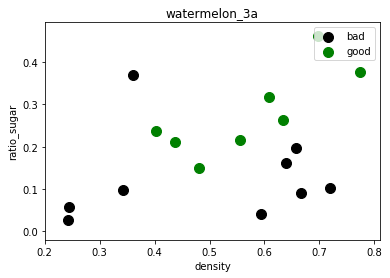

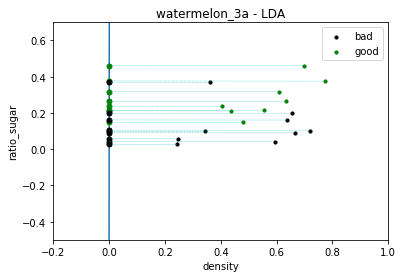

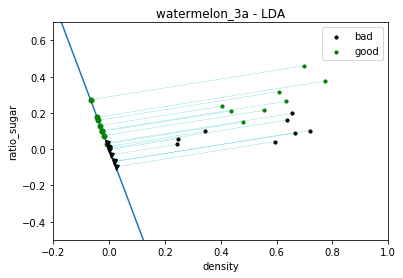

In [19]:
# -*- coding: utf-8 -*

'''''
Create on 2017/3/21
@author PY131
'''''
from _operator import inv

'''
data importion and pre-analysis
'''
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 

# load the CSV file as a numpy matrix
data_file = open('watermelon_3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")

# separate the data from the target attributes
X = dataset[:,1:3]
y = dataset[:,3]

# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')  
# plt.show()

'''
LDA via sklearn
'''
'''
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
# generalization of train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)
# model fitting
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)
# model validation
y_pred = lda_model.predict(X_test)
# summarize the fit of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
# draw the classfier decision boundary
f2 = plt.figure(2) 
h = 0.001
# x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
# x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
x0, x1 = np.meshgrid(np.arange(-1, 1, h),
                     np.arange(-1, 1, h))
# x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
#                      np.arange(x1_min, x1_max, h))
z = lda_model.predict(np.c_[x0.ravel(), x1.ravel()]) 
# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z)
# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
# plt.show()
'''

'''
implementation of LDA based on self-coding
'''

# computing the d-dimensional mean vectors
# import numpy as np
# 1-st. get the mean vector of each class
# u = []  
# for i in range(2): # two class
#     u.append(np.mean(X[y==i], axis=0))  # column mean
# 
# # 2-nd. computing the within-class scatter matrix, refer on book (3.33)
# m,n = np.shape(X)
# Sw = np.zeros((n,n))
# for i in range(m):
#     x_tmp = np.mat(X[i]).T
#     if   y[i] == 0: u_tmp = np.mat(u[0]).T
#     elif y[i] == 1: u_tmp = np.mat(u[1]).T
#     Sw += (x_tmp - u_tmp) * (x_tmp - u_tmp).T
# print(Sw)
        

# 1-st. get the mean vector of each class

u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

# 4-th draw the LDA line in scatter figure

# f2 = plt.figure(2)
f3 = plt.figure(3)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line
from self_def import GetProjectivePoint_2D 

m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'ko', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

# plt.show()

'''
implementation of LDA again after delete outlier (X[14])
'''
# computing the d-dimensional mean vectors
# import numpy as np

# 1-st. get the mean vector of each class
X = np.delete(X, 14, 0)
y = np.delete(y, 14, 0)

u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

# 4-th draw the LDA line in scatter figure

# f2 = plt.figure(2)
f4 = plt.figure(4)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line
from self_def import GetProjectivePoint_2D 

m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'kv', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

plt.show()

[[0.697  0.46  ]
 [0.774  0.376 ]
 [0.634  0.264 ]
 [0.608  0.318 ]
 [0.556  0.215 ]
 [0.403  0.237 ]
 [0.481  0.149 ]
 [0.437  0.211 ]
 [0.666  0.091 ]
 [0.243  0.0267]
 [0.245  0.057 ]
 [0.343  0.099 ]
 [0.639  0.161 ]
 [0.657  0.198 ]
 [0.36   0.37  ]
 [0.593  0.042 ]
 [0.719  0.103 ]]
[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.666 0.243 0.245 0.343 0.639 0.657 0.36  0.593 0.719]
[0.091  0.0267 0.057  0.099  0.161  0.198  0.37   0.042  0.103 ]


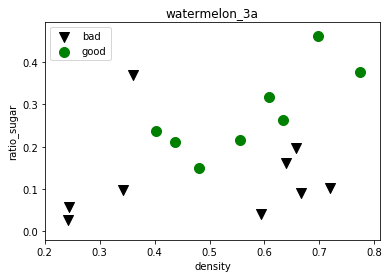

In [12]:
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 

# load the CSV file as a numpy matrix
data_file = open('watermelon_3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")

# separate the data from the target attributes
X = dataset[:,1:3]
print(X)
y = dataset[:,3]
print(y)
print(X[ y==0,0])
print(X[y == 0,1])

# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[ y==0,0], X[y == 0,1], marker = 'v', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper left')  

plt.show()



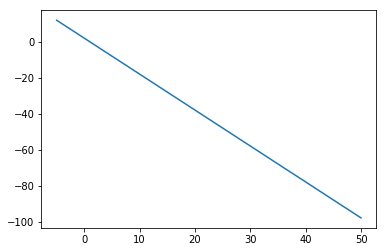

In [2]:
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 


x1=np.linspace(-5,50,10)
x2=2-2*x1;
plt.plot(x1,x2);
plt.show()

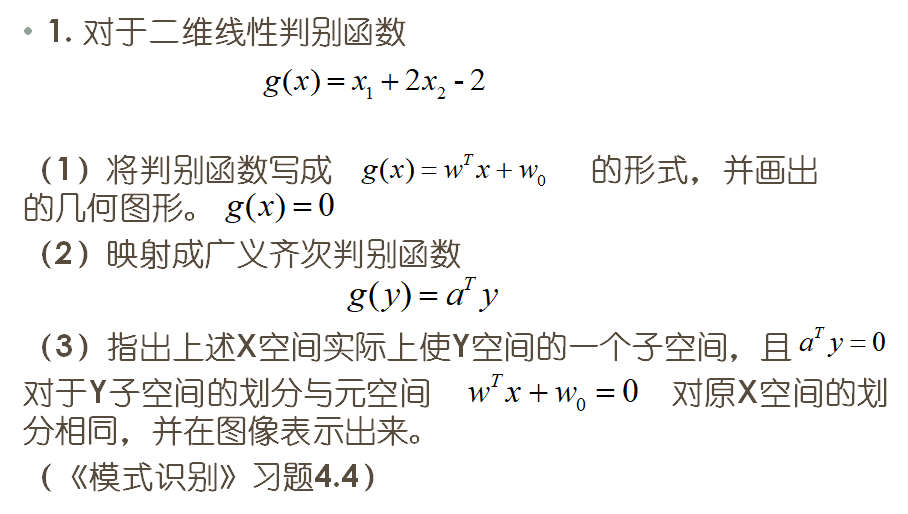

100
w
[1 2]
y : [ 24 162] 
y : [80 12] 
y : [ 5 16] 
y : [ 7 88] 
y : [43 54] 
y : [26 52] 
y : [25 28] 
y : [ 13 122] 
y : [60 30] 
y : [14 56] 
y : [27 66] 
y : [32 86] 
y : [42 34] 
y : [ 16 114] 
y : [ 56 160] 
y : [79 46] 
y : [22 44] 
y : [ 21 126] 
y : [62 24] 
y : [ 11 106] 
y : [ 52 170] 
y : [ 84 118] 
y : [ 58 104] 
y : [ 51 186] 
y : [ 92 196] 
y : [97  0] 
y : [-1  2] 
y : [ 0 96] 
y : [47 26] 
y : [12 80] 
y : [ 39 128] 
y : [ 63 136] 
y : [67 42] 
y : [ 20 124] 
y : [61 32] 
y : [ 15 192] 
y : [95 92] 
y : [ 45 176] 
y : [ 87 188] 
y : [93 90] 
y : [44 94] 
y : [46 78] 
y : [ 38 134] 
y : [ 66 182] 
y : [ 90 132] 
y : [ 65 120] 
y : [59 74] 
y : [ 36 102] 
y : [50 98] 
y : [ 48 100] 
y : [ 49 108] 
y : [ 53 116] 
y : [ 57 168] 
y : [ 83 110] 
y : [54 76] 
y : [ 37 194] 
y : [ 96 164] 
y : [ 81 178] 
y : [88 20] 
y : [  9 144] 
y : [71 70] 
y : [ 34 130] 
y : [ 64 190] 
y : [94 36] 
y : [17 82] 
y : [40 10] 
y : [4 8] 
y : [ 3 62] 
y : [30 64] 
y : [31 -2] 
y : [-2 68] 
y

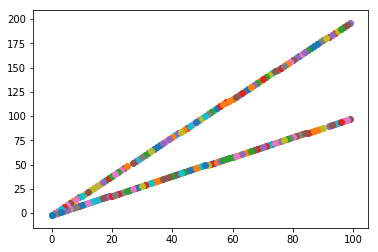

[26 82  7  9 45 28 27 15 62 16 29 34 44 18 58 81 24 23 64 13 54 86 60 53
 94 99  1  2 49 14 41 65 69 22 63 17 97 47 89 95 46 48 40 68 92 67 61 38
 52 50 51 55 59 85 56 39 98 83 90 11 73 36 66 96 19 42  6  5 32 33  0 35
 25 31  4 37 80 79 75 72 10 88 57 71 76 93 12  8 30 43  3 87 78 20 70 84
 74 21 77 91]


In [3]:
 '''
 
 画图函数的不熟悉，以及公式到底该如何表达也不是很清晰
 
 百度搜索实在是找不到答案。磨刀不误砍柴工，2018/5/17晚上临时决定搭建VPS
 
 至少解决的问题速度快了些
 
 


和同学讨论以后，思路更清晰。
同时也对老师上课讲的概念如此之模糊深恶痛绝。误导学生，走弯路走的太多了



 '''

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

import numpy as np
import matplotlib.pyplot as plt
loc,scale=0,10 #均值与标准差
#loc=0.0, scale=1.0, size=None
range_number=100
rarray=np.random.normal(loc,scale,range_number)
rarray=np.arange(range_number)
np.random.shuffle(rarray)
matrix=rarray.reshape(range_number,1)
print(matrix.shape[0])
w=np.array([1,2])
print("w")
print(w)
for i in range(matrix.shape[0]-1):
    #print(i)
    #print(rarray[i:i+2,])
    y=np.multiply(w,rarray[i:i+2,])-2
    print("y : %s "%(y))
    plt.scatter(rarray[i:i+2,],y)
    #if(i%2==0):
        #print(i%2)
        #plt.scatter(rarray[i:i+2,],y)
    
    #plt.plot(rarray[i:i+2,],y)


#plt.plot(rarray,y)
plt.show()
print(rarray)

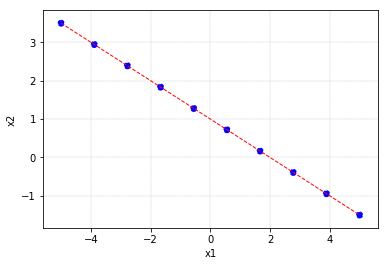

In [27]:


import numpy as np
import matplotlib.pyplot as plt

w0=-2
w1=1
w2=2
x1=-(w0/w1)
x2=-(w0/w2)
g=w1*x1+w2*x2+w0

k=(x2)/(0-x1)
x=np.linspace(-5,5,10)
y=k*x+x2
plt.grid(True, linestyle = "-.", color = "black", linewidth = "0.1")  
#plt.yticks([-2, -1.8, -1, 1.22, 3],[r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$really\ good$'])
plt.plot(x,y,color='red', linewidth=1.0, linestyle='--')
plt.scatter(x,y,color='blue', linewidth=1.0, linestyle='--')
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.show()


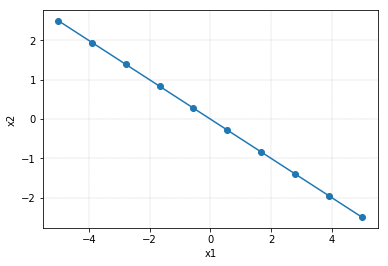

In [28]:
import numpy as np
import matplotlib.pyplot as plt

w0=-2
w1=1
w2=2
x1=-(w0/w1)
x2=-(w0/w2)
g=w1*x1+w2*x2

k=(x2)/(0-x1)
plt.grid(True, linestyle = "-.", color = "black", linewidth = "0.1")   
x=np.linspace(-5,5,10)
y=k*x
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('x1')  
plt.ylabel('x2')  
plt.show()

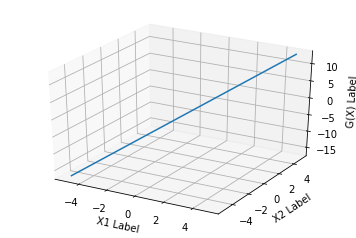

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w0=-2
w1=1
w2=2
x1=-(w0/w1)
x2=-(w0/w2)


k=(x2)/(0-x1)
plt.grid(True, linestyle = "-.", color = "black", linewidth = "0.1")   
x1=np.linspace(-5,5,10)
x2=np.linspace(-5,5,10)

g=w1*x1+w2*x2+w0
ax.plot(x1, x2, g, label='plane')


ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('G(X) Label')

plt.show()

100
w
[1 2]
y : [14 40] 
y : [19 94] 
y : [ 46 108] 
y : [53 48] 
y : [23 44] 
y : [21 36] 
y : [ 17 196] 
y : [ 97 130] 
y : [64 74] 
y : [36 34] 
y : [ 16 132] 
y : [ 65 102] 
y : [ 50 190] 
y : [ 94 106] 
y : [52  4] 
y : [  1 128] 
y : [ 63 164] 
y : [ 81 194] 
y : [96 72] 
y : [35 96] 
y : [47 50] 
y : [ 24 112] 
y : [55 22] 
y : [10 52] 
y : [ 25 176] 
y : [87 46] 
y : [ 22 162] 
y : [ 80 104] 
y : [ 51 178] 
y : [88 64] 
y : [ 31 170] 
y : [84 24] 
y : [11 56] 
y : [27 16] 
y : [  7 100] 
y : [49 12] 
y : [5 0] 
y : [-1 92] 
y : [ 45 144] 
y : [71 60] 
y : [ 29 148] 
y : [73 10] 
y : [4 2] 
y : [  0 118] 
y : [58 76] 
y : [ 37 142] 
y : [ 70 168] 
y : [ 83 116] 
y : [ 57 188] 
y : [93 90] 
y : [ 44 134] 
y : [66 80] 
y : [39 58] 
y : [ 28 158] 
y : [ 78 120] 
y : [59 20] 
y : [ 9 54] 
y : [26 26] 
y : [12 70] 
y : [34  6] 
y : [  2 186] 
y : [ 92 192] 
y : [ 95 150] 
y : [74 38] 
y : [ 18 138] 
y : [ 68 126] 
y : [62 86] 
y : [ 42 146] 
y : [ 72 110] 
y : [54 62] 
y : [ 30 152] 

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

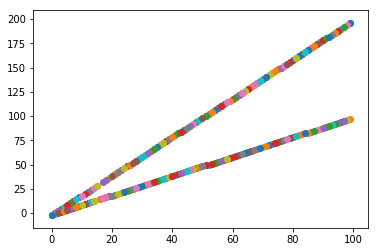

In [2]:
import numpy as np
import matplotlib.pyplot as plt
loc,scale=0,10 #均值与标准差
#loc=0.0, scale=1.0, size=None
range_number=100
rarray=np.random.normal(loc,scale,range_number)
rarray=np.arange(range_number)
np.random.shuffle(rarray)
matrix=rarray.reshape(range_number,1)
print(matrix.shape[0])
w=np.array([1,2])
print("w")
print(w)
for i in range(matrix.shape[0]-1):
    #print(i)
    #print(rarray[i:i+2,])
    y=np.multiply(w,rarray[i:i+2,])-2
    #print("y : %s "%(y))
    plt.scatter(rarray[i:i+2,],y)
    if(i%2==0):
        #print(i%2)
        plt.scatter(rarray[i:i+2,],y)
    
    #plt.plot(rarray[i:i+2,],y)


plt.plot(rarray,y)
plt.show()
print(rarray)